## CSVLogger のメトリクスログを解析・ matplotlib でグラフ化


In [8]:
import glob

csv_logdir = "../log/scale_free_vae/WAE_clamp_min_decay-0.001/trial=*/gamma=*/csv"
metrics_files = sorted(glob.glob(f"{csv_logdir}/**/metrics.csv", recursive=True))
metrics_files[:10]

['../log/scale_free_vae/WAE_clamp_min_decay-0.001/trial=0/gamma=0.0/csv/lightning_logs/version_0/metrics.csv',
 '../log/scale_free_vae/WAE_clamp_min_decay-0.001/trial=0/gamma=0.1/csv/lightning_logs/version_0/metrics.csv',
 '../log/scale_free_vae/WAE_clamp_min_decay-0.001/trial=0/gamma=0.2/csv/lightning_logs/version_0/metrics.csv',
 '../log/scale_free_vae/WAE_clamp_min_decay-0.001/trial=0/gamma=0.30000000000000004/csv/lightning_logs/version_0/metrics.csv',
 '../log/scale_free_vae/WAE_clamp_min_decay-0.001/trial=0/gamma=0.4/csv/lightning_logs/version_0/metrics.csv',
 '../log/scale_free_vae/WAE_clamp_min_decay-0.001/trial=0/gamma=0.5/csv/lightning_logs/version_0/metrics.csv',
 '../log/scale_free_vae/WAE_clamp_min_decay-0.001/trial=0/gamma=0.6000000000000001/csv/lightning_logs/version_0/metrics.csv',
 '../log/scale_free_vae/WAE_clamp_min_decay-0.001/trial=0/gamma=0.7000000000000001/csv/lightning_logs/version_0/metrics.csv',
 '../log/scale_free_vae/WAE_clamp_min_decay-0.001/trial=0/gamma=0.

In [9]:

def metrics_parser(metrics_path):
    trial_str, gamma_str = metrics_path.split("/")[-6], metrics_path.split("/")[-5]
    trial = int(trial_str.replace("trial=", ""))
    gamma = float(gamma_str.replace("gamma=", ""))
    gamma = round(gamma, 3)
    return trial, gamma

In [10]:
import pandas as pd

metrics_path = metrics_files[0]
trial, gamma = metrics_parser(metrics_path)
df = pd.read_csv(metrics_path)
df

,train_recon_loss,train_wasserstein,train_loss,epoch,step,val_recon_loss,val_wasserstein,val_loss,initial_val_recon_loss,initial_val_wasserstein,initial_val_loss
0,0.079915,0.011867,0.091782,0,49,NaN,NaN,NaN,NaN,NaN,NaN
1,0.058580,0.006587,0.065167,0,99,NaN,NaN,NaN,NaN,NaN,NaN
2,0.056573,0.004453,0.061026,0,149,NaN,NaN,NaN,NaN,NaN,NaN
3,0.058697,0.005117,0.063813,0,199,NaN,NaN,NaN,NaN,NaN,NaN
4,0.050958,0.004481,0.055438,0,249,NaN,NaN,NaN,NaN,NaN,NaN
5,0.051504,0.004137,0.055640,0,299,NaN,NaN,NaN,NaN,NaN,NaN
6,0.048246,0.004792,0.053038,0,349,NaN,NaN,NaN,NaN,NaN,NaN
7,0.051179,0.005054,0.056233,0,399,NaN,NaN,NaN,NaN,NaN,NaN
8,0.041439,0.004653,0.046092,0,449,NaN,NaN,NaN,NaN,NaN,NaN
9,0.046521,0.005076,0.051597,0,499,NaN,NaN,NaN,NaN,NaN,NaN


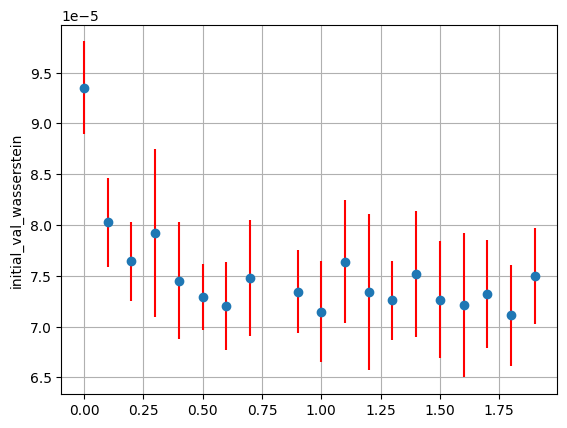

<Figure size 640x480 with 0 Axes>

In [51]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import pandas as pd

def get_value_from_csv(csv_path, column_name, epoch):
    # Get the not a nan value of the column_name at the last epoch
    try:
        df = pd.read_csv(csv_path)
        df = df[df["epoch"] == epoch]
        df = df[df[column_name].notna()]
        df =  df[column_name].values[0]
    except Exception as e:
        df = np.nan
    return df

def draw_graph(metrics_files, column_name, epoch):
    results = dict()
    for path in metrics_files:
        trial, gamma = metrics_parser(path)
        value = get_value_from_csv(path, column_name, epoch)
        if gamma not in results.keys():
            results[gamma] = []

        results[gamma].append(value)
    
    gammas = []
    means = []
    stds = []

    for gamma, values in results.items():
        gammas.append(gamma)
        means.append(np.mean(values))
        stds.append(np.std(values))

    # Draw the graph with error bar and save it
    plt.errorbar(gammas, means, yerr=stds, fmt="o", ecolor='r')
    plt.ylabel(column_name)
    plt.grid()
#    plt.xlim(-0.1, 2)
#    plt.ylim(0.00, 0)
    plt.show()
    # clear the figure
    plt.clf()
    

draw_graph(metrics_files, "initial_val_wasserstein", epoch=0)

/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:232: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


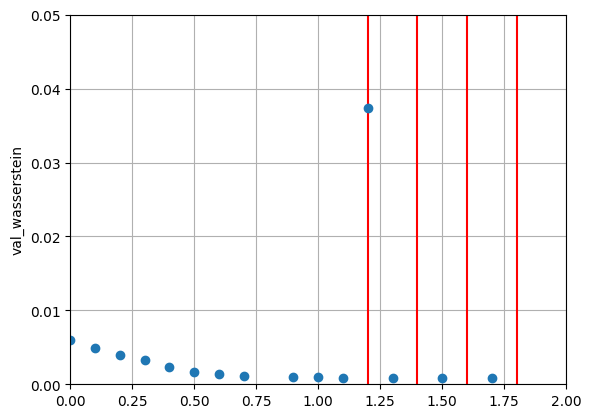

<Figure size 640x480 with 0 Axes>

In [24]:
draw_graph(metrics_files, "val_wasserstein", epoch=0)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 400/400 [00:01<00:00, 214.61it/s]


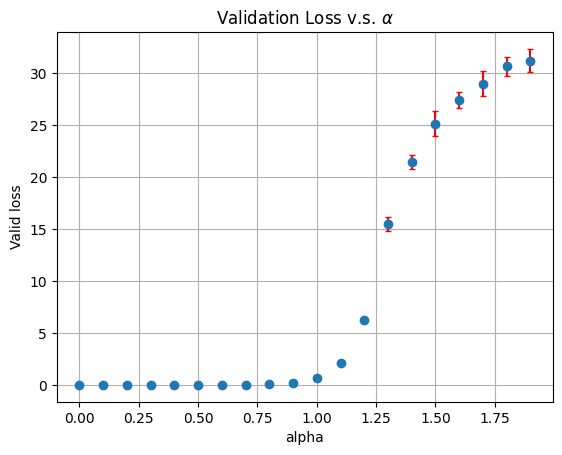

In [14]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import pandas as pd

results = dict()
for path in tqdm(metrics_files):
    try:
        trial, gamma = metrics_parser(path)
        df = pd.read_csv(path)
        metrics = df.iloc[25]["val_loss"]
        # metrics = df.iloc[25]["val_recon_loss"]
        # metrics = df.iloc[25]["val_kl"]
        # metrics = df.iloc[0:25]['train_loss'].mean()
        # metrics = df.iloc[0:25]['train_recon_loss'].mean()
        # metrics = df.iloc[0:25]['train_kl'].mean()
        
        # gammaが辞書に存在しない場合は新たにキーを作成
        if gamma not in results:
            results[gamma] = []

        # 結果を辞書に追加
        results[gamma].append(metrics)
    except IndexError:
        continue
    
    

# エラーバーの計算
gammas = []
means = []
stds = []


for gamma, metrics in results.items():
    gammas.append(gamma)
    means.append(np.mean(metrics))
    stds.append(np.std(metrics))

# グラフの描画
plt.errorbar(gammas, means, yerr=stds, fmt='o', ecolor='r', capsize=2)
plt.xlabel('alpha')
plt.ylabel('Valid loss')
plt.title(r'Validation Loss v.s. $\alpha$')
plt.grid()
plt.show()

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 400/400 [00:01<00:00, 378.13it/s]


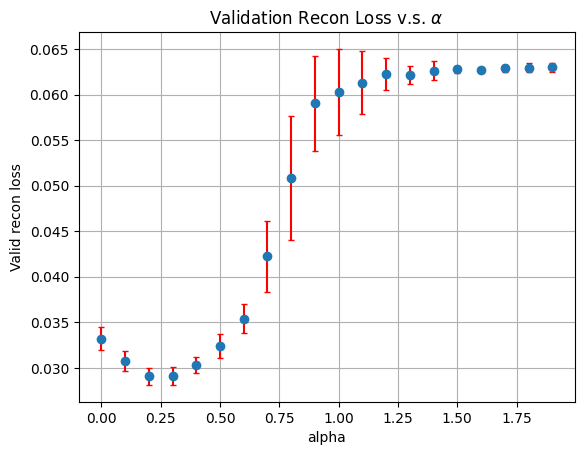

In [15]:
results = dict()
for path in tqdm(metrics_files):
    try:
        trial, gamma = metrics_parser(path)
        df = pd.read_csv(path)
        # metrics = df.iloc[25]["val_loss"]
        metrics = df.iloc[25]["val_recon_loss"]
        # metrics = df.iloc[25]["val_kl"]
        # metrics = df.iloc[0:25]['train_loss'].mean()
        # metrics = df.iloc[0:25]['train_recon_loss'].mean()
        # metrics = df.iloc[0:25]['train_kl'].mean()
        
        # gammaが辞書に存在しない場合は新たにキーを作成
        if gamma not in results:
            results[gamma] = []

        # 結果を辞書に追加
        results[gamma].append(metrics)
    except IndexError:
        continue


# エラーバーの計算
gammas = []
means = []
stds = []


for gamma, metrics in results.items():
    gammas.append(gamma)
    means.append(np.mean(metrics))
    stds.append(np.std(metrics))

# グラフの描画
plt.errorbar(gammas, means, yerr=stds, fmt='o', ecolor='r', capsize=2)
plt.xlabel('alpha')
plt.ylabel('Valid recon loss')
plt.title(r'Validation Recon Loss v.s. $\alpha$')
plt.grid()
plt.show()

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 400/400 [00:00<00:00, 407.08it/s]


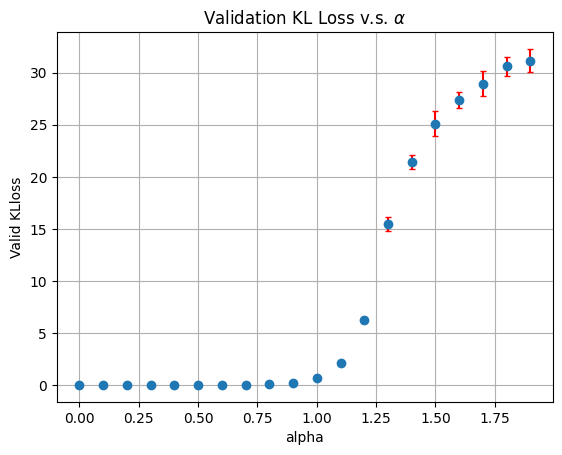

In [16]:
results = dict()
for path in tqdm(metrics_files):
    try:
        trial, gamma = metrics_parser(path)
        df = pd.read_csv(path)
        # metrics = df.iloc[25]["val_loss"]
        # metrics = df.iloc[25]["val_recon_loss"]
        metrics = df.iloc[25]["val_kl"]
        # metrics = df.iloc[0:25]['train_loss'].mean()
        # metrics = df.iloc[0:25]['train_recon_loss'].mean()
        # metrics = df.iloc[0:25]['train_kl'].mean()
        
        # gammaが辞書に存在しない場合は新たにキーを作成
        if gamma not in results:
            results[gamma] = []

        # 結果を辞書に追加
        results[gamma].append(metrics)
    except IndexError:
        continue


# エラーバーの計算
gammas = []
means = []
stds = []


for gamma, metrics in results.items():
    gammas.append(gamma)
    means.append(np.mean(metrics))
    stds.append(np.std(metrics))

# グラフの描画
plt.errorbar(gammas, means, yerr=stds, fmt='o', ecolor='r', capsize=2)
plt.xlabel('alpha')
plt.ylabel('Valid KLloss')
plt.title(r'Validation KL Loss v.s. $\alpha$')
plt.grid()
plt.show()

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 400/400 [00:01<00:00, 385.01it/s]


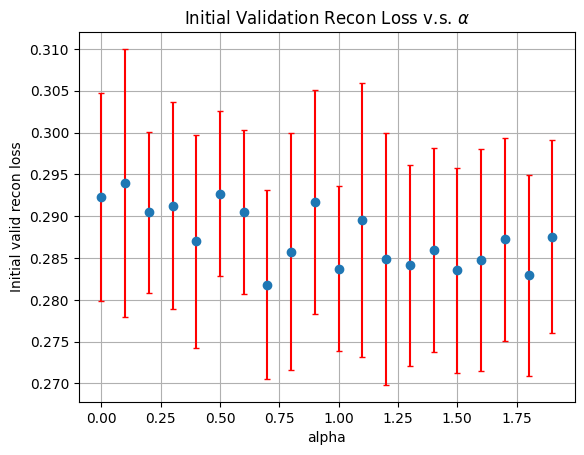

In [17]:
results = dict()
for path in tqdm(metrics_files):
    trial, gamma = metrics_parser(path)
    df = pd.read_csv(path)
    # metrics = df.iloc[25]["val_loss"]
    # metrics = df.iloc[25]["val_recon_loss"]
    metrics = df.iloc[26]["initial_val_recon_loss"]
    # metrics = df.iloc[0:25]['train_loss'].mean()
    # metrics = df.iloc[0:25]['train_recon_loss'].mean()
    # metrics = df.iloc[0:25]['train_kl'].mean()
    
    # gammaが辞書に存在しない場合は新たにキーを作成
    if gamma not in results:
        results[gamma] = []

    # 結果を辞書に追加
    results[gamma].append(metrics)
    
    

# エラーバーの計算
gammas = []
means = []
stds = []


for gamma, metrics in results.items():
    gammas.append(gamma)
    means.append(np.mean(metrics))
    stds.append(np.std(metrics))

# グラフの描画
plt.errorbar(gammas, means, yerr=stds, fmt='o', ecolor='r', capsize=2)
plt.xlabel('alpha')
plt.ylabel('Initial valid recon loss')
plt.title(r'Initial Validation Recon Loss v.s. $\alpha$')
plt.grid()
plt.show()

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 400/400 [00:01<00:00, 361.36it/s]


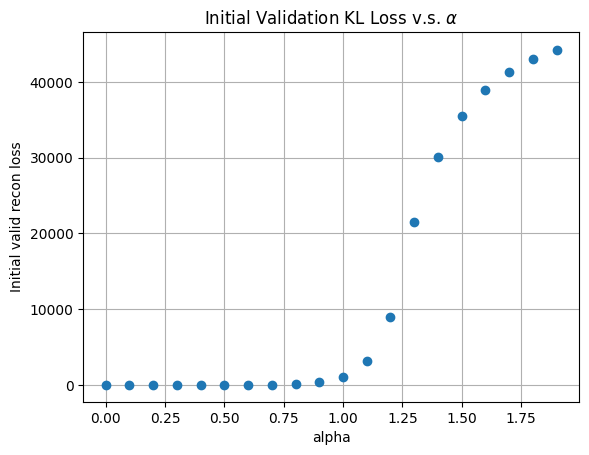

In [18]:
results = dict()
for path in tqdm(metrics_files):
    trial, gamma = metrics_parser(path)
    df = pd.read_csv(path)
    # metrics = df.iloc[25]["val_loss"]
    # metrics = df.iloc[25]["val_recon_loss"]
    metrics = df.iloc[26]["initial_val_kl"]
    # metrics = df.iloc[0:25]['train_loss'].mean()
    # metrics = df.iloc[0:25]['train_recon_loss'].mean()
    # metrics = df.iloc[0:25]['train_kl'].mean()
    
    # gammaが辞書に存在しない場合は新たにキーを作成
    if gamma not in results:
        results[gamma] = []

    # 結果を辞書に追加
    results[gamma].append(metrics)
    
    

# エラーバーの計算
gammas = []
means = []
stds = []


for gamma, metrics in results.items():
    gammas.append(gamma)
    means.append(np.mean(metrics))
    stds.append(np.std(metrics))

# グラフの描画
plt.errorbar(gammas, means, yerr=stds, fmt='o', ecolor='r', capsize=2)
plt.xlabel('alpha')
plt.ylabel('Initial valid recon loss')
plt.title(r'Initial Validation KL Loss v.s. $\alpha$')
plt.grid()
plt.show()

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 400/400 [00:01<00:00, 348.93it/s]


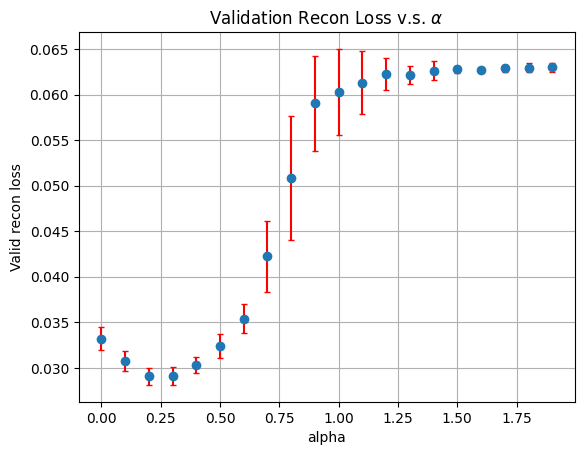

In [19]:
results = dict()
for path in tqdm(metrics_files):
    try:
        trial, gamma = metrics_parser(path)
        df = pd.read_csv(path)
        # metrics = df.iloc[25]["val_loss"]
        metrics = df.iloc[25]["val_recon_loss"]
        # metrics = df.iloc[25]["val_kl"]
        # metrics = df.iloc[0:25]['train_loss'].mean()
        # metrics = df.iloc[0:25]['train_recon_loss'].mean()
        # metrics = df.iloc[0:25]['train_kl'].mean()
        
        # gammaが辞書に存在しない場合は新たにキーを作成
        if gamma not in results:
            results[gamma] = []

        # 結果を辞書に追加
        results[gamma].append(metrics)
    except IndexError:
        continue


# エラーバーの計算
gammas = []
means = []
stds = []


for gamma, metrics in results.items():
    gammas.append(gamma)
    means.append(np.mean(metrics))
    stds.append(np.std(metrics))

# グラフの描画
plt.errorbar(gammas, means, yerr=stds, fmt='o', ecolor='r', capsize=2)
plt.xlabel('alpha')
plt.ylabel('Valid recon loss')
plt.title(r'Validation Recon Loss v.s. $\alpha$')
plt.grid()
plt.show()

- `hparams.yaml` の中身:
    ```yaml
    lr: 0.01
    n_hid: 100
    n_vis: 784
    normalize_loss: false
    optimizer_name: sgd
    power_law_gamma: 9.5
    ```
- `metrics.csv` の中身: logger に放り込んだ値がごちゃっと入っている